In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline

In [2]:
data_Ag = pd.read_csv('Ag_wat_confout.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z', 'vx', 'vy', 'vz'])
data_Au = pd.read_csv('Au_wat_confout.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z', 'vx', 'vy', 'vz'])

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [3]:
data_Ag.head()

,residue,atom,atom_num,x,y,z,vx,vy,vz
0,1SIL,Ag,1,0.734,0.364,0.009,-0.0790,0.1672,-0.0751
1,2SIL,Ag,2,0.873,0.600,0.015,-0.0682,0.2150,0.3344
2,3SIL,Ag,3,0.736,0.531,0.261,0.1624,-0.0020,-0.1569
3,4SIL,Ag,4,0.881,0.778,0.248,-0.3108,0.0476,-0.1714
4,5SIL,Ag,5,0.885,0.441,0.482,-0.0617,0.0007,0.2445


In [4]:
def hist_water_surface(df, surface, bin_num):
    #get the range of water moleculars
    wat_min = min(
        [ df [df.atom == 'OW'].z.min(), df [df.atom == 'HW1'].z.min(), df [df.atom == 'HW2'].z.min()])
    wat_max = max(
        [ df [df.atom == 'OW'].z.max(), df [df.atom == 'HW1'].z.max(), df [df.atom == 'HW2'].z.max()])
    #check if it remains only surface out of that range
    for index, row in df[ df.z > wat_max ].iterrows():
        assert row.atom == surface; "Wrong!"
    for index, row in df[ df.z < wat_min ].iterrows():
        assert row.atom == surface; "Wrong!"
    #distance between O and the surface
    dist = df[ df.atom == 'OW' ][ df.z >= wat_min ][ df.z <= wat_max ].z - df[ df.z < wat_min].z.max()
    #plot hist
    n, bins, patches = plt.hist(dist, bin_num, edgecolor = 'k', lw = 1.5)
    #put a line on bar
    n_ = np.insert(n, 0, 0)
    n_ = np.append(n_, 0)
    bin_size = (max(bins) - min(bins))/ bin_num
    bin_ = np.insert(bins[0:(len(bins)-1)], 0, min(bins) - bin_size)
    bin_ = np.append(bin_, max(bins) + bin_size)
    plt.plot(bin_, n_, lw = 2.5)
    plt.xlabel('Distance (nm)')
    plt.ylabel('Number of O')
    plt.grid(linestyle = 'dashed')
    title = 'Distance Between O-atom and '+ surface+ '-surface'
    plt.title('Distance Between O-atom and '+ surface+ '-surface')
#    plt.savefig('dis_O_'+ surface +'.png', dpi = 900)
    return n, bins, plt

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(array([  75.,   92.,   24.,    5.,    1.,   11.,   42.,   39.,   30.,
          24.,   18.,   26.,   29.,   27.,   29.,   22.,   24.,   18.,
          29.,   28.,   23.,   16.,   29.,   22.,   26.,   23.,   24.,
          25.,   29.,   27.,   27.,   19.,   25.,   20.,   22.,   28.,
          27.,   23.,   24.,   18.,   30.,   32.,   47.,   23.,    7.,
           6.,    4.,   32.,  106.,   54.]),
 array([ 0.196  ,  0.23972,  0.28344,  0.32716,  0.37088,  0.4146 ,
         0.45832,  0.50204,  0.54576,  0.58948,  0.6332 ,  0.67692,
         0.72064,  0.76436,  0.80808,  0.8518 ,  0.89552,  0.93924,
         0.98296,  1.02668,  1.0704 ,  1.11412,  1.15784,  1.20156,
         1.24528,  1.289  ,  1.33272,  1.37644,  1.42016,  1.46388,
         1.5076 ,  1.55132,  1.59504,  1.63876,  1.68248,  1.7262 ,
         1.76992,  1.81364,  1.85736,  1.90108,  1.9448 ,  1.98852,
         2.03224,  2.07596,  2.11968,  2.1634 ,  2.20712,  2.25084,
         2.29456,  2.33828,  2.382  ]),
 <module 'matplo

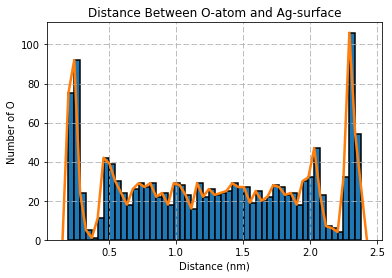

In [8]:
hist_water_surface(data_Ag, 'Ag', 50)

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(array([  85.,   92.,   18.,    6.,    4.,   10.,   35.,   36.,   38.,
          11.,   28.,   31.,   22.,   18.,   23.,   23.,   32.,   22.,
          28.,   27.,   22.,   23.,   32.,   20.,   25.,   23.,   21.,
          31.,   23.,   23.,   24.,   25.,   20.,   30.,   22.,   30.,
          20.,   26.,   21.,   20.,   18.,   31.,   61.,   19.,   10.,
           3.,    3.,   29.,  110.,   57.]),
 array([ 0.197  ,  0.24056,  0.28412,  0.32768,  0.37124,  0.4148 ,
         0.45836,  0.50192,  0.54548,  0.58904,  0.6326 ,  0.67616,
         0.71972,  0.76328,  0.80684,  0.8504 ,  0.89396,  0.93752,
         0.98108,  1.02464,  1.0682 ,  1.11176,  1.15532,  1.19888,
         1.24244,  1.286  ,  1.32956,  1.37312,  1.41668,  1.46024,
         1.5038 ,  1.54736,  1.59092,  1.63448,  1.67804,  1.7216 ,
         1.76516,  1.80872,  1.85228,  1.89584,  1.9394 ,  1.98296,
         2.02652,  2.07008,  2.11364,  2.1572 ,  2.20076,  2.24432,
         2.28788,  2.33144,  2.375  ]),
 <module 'matplo

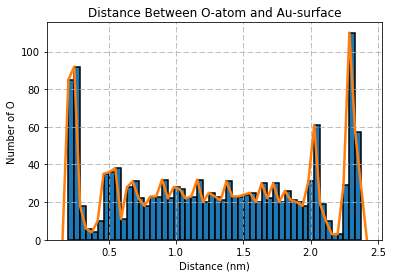

In [6]:
hist_water_surface(data_Au, 'Au', 50)

In [14]:
Ag_init = pd.read_csv('ag_wat_init.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z'])

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(array([ 11.,  28.,  36.,  32.,  20.,  34.,  22.,  44.,  24.,  25.,  24.,
         25.,  46.,  25.,  23.,  26.,  47.,  24.,  10.,  26.,  54.,  20.,
         14.,  37.,  32.,  20.,  10.,  32.,  43.,  38.,  29.,  20.,  28.,
         27.,  14.,  53.,  20.,  24.,  32.,  36.,  44.,  16.,  34.,  26.,
         38.,  30.,  21.,  28.,  25.,  14.]),
 array([ 0.16   ,  0.21004,  0.26008,  0.31012,  0.36016,  0.4102 ,
         0.46024,  0.51028,  0.56032,  0.61036,  0.6604 ,  0.71044,
         0.76048,  0.81052,  0.86056,  0.9106 ,  0.96064,  1.01068,
         1.06072,  1.11076,  1.1608 ,  1.21084,  1.26088,  1.31092,
         1.36096,  1.411  ,  1.46104,  1.51108,  1.56112,  1.61116,
         1.6612 ,  1.71124,  1.76128,  1.81132,  1.86136,  1.9114 ,
         1.96144,  2.01148,  2.06152,  2.11156,  2.1616 ,  2.21164,
         2.26168,  2.31172,  2.36176,  2.4118 ,  2.46184,  2.51188,
         2.56192,  2.61196,  2.662  ]),
 <module 'matplotlib.pyplot' from '/Users/taiyupan/miniconda3/lib/python3.

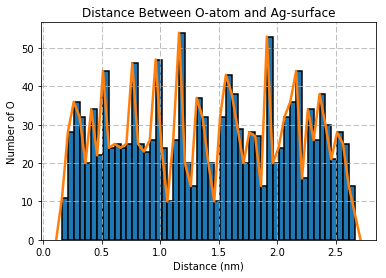

In [15]:
hist_water_surface(Ag_init, 'Ag', 50)